<a href="https://colab.research.google.com/github/gnishtha/3/blob/master/Mini_Project_6th_Sem_mark_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
import time
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import VarianceThreshold

In [0]:
# Setting the default values for some plotting parameters
plt.rcParams["axes.labelsize"] = 16
plt.rcParams["axes.titlesize"] = 18
plt.rcParams["xtick.labelsize"] = 14
plt.rcParams["ytick.labelsize"] = 14
plt.rcParams["legend.fontsize"] = 12
plt.rcParams["figure.figsize"] = [10,8]

In [0]:
#Fetching dataset
dataset = fetch_openml('mnist_784')
print(dataset)

{'data': array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]]), 'target': array(['5', '0', '4', ..., '4', '5', '6'], dtype=object), 'frame': None, 'feature_names': ['pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6', 'pixel7', 'pixel8', 'pixel9', 'pixel10', 'pixel11', 'pixel12', 'pixel13', 'pixel14', 'pixel15', 'pixel16', 'pixel17', 'pixel18', 'pixel19', 'pixel20', 'pixel21', 'pixel22', 'pixel23', 'pixel24', 'pixel25', 'pixel26', 'pixel27', 'pixel28', 'pixel29', 'pixel30', 'pixel31', 'pixel32', 'pixel33', 'pixel34', 'pixel35', 'pixel36', 'pixel37', 'pixel38', 'pixel39', 'pixel40', 'pixel41', 'pixel42', 'pixel43', 'pixel44', 'pixel45', 'pixel46', 'pixel47', 'pixel48', 'pixel49', 'pixel50', 'pixel51', 'pixel52', 'pixel53', 'pixel54', 'pixel55', 'pixel56', 'pixel57', 'pixel58', 'pixel59', 'pixel60

In [0]:
#Splitting datset into train and test parts
train_X, test_X, train_Y, test_Y = train_test_split(dataset.data,dataset.target,test_size=0.8)

In [0]:
#Standardizing the data.
#It arranges the data in a standard normal distribution
sc = StandardScaler()

sc.fit(train_X)

train_X = sc.transform(train_X)
test_X = sc.transform(test_X)

# **Applying Logisting Regression Classification Technique**




In [0]:
lr = LogisticRegression()
#fitting our logistic regression model to our training dataset
start = time.time()
lr.fit(train_X,train_Y)
stop = time.time()
#making predictions through the model trained
pred = lr.predict(test_X)
#calculating time taken by the model to get trained
print("Training Time"+str(stop-start))
#printing the accuracy score
print("Accuracy Score:"+str(accuracy_score(test_Y,pred)))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


8.122954368591309
0.8826071428571428


# **Applying first dimensionality reduction technique i.e. Prinicpal Component Analysis(PCA)**

In [0]:
#bring the number of components down to 400
pca = PCA(n_components=400)
pca.fit(train_X)
#tranforming the training and dataset to contain principal components only
pc_train_X = pca.transform(train_X)
pc_test_X = pca.transform(test_X)

In [0]:
#Applying logistic regression classification technique after applying PCA
lr = LogisticRegression()
#traing the model
start = time.time()
lr.fit(pc_train_X,train_Y)
stop = time.time()
#making predictions using trained model
pred = lr.predict(pc_test_X)
#printing the training time
print("Training time: "+ str(stop-start))
#printing the accuracy score
print("Accuracy Score:"+str(accuracy_score(test_Y,pred)))

4.43428897857666
0.8952142857142857


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


# **Applying the second dimensionality reductions technique i.e. by dropping columns having low variance then threshold.**

In [0]:
#setting the threshold values as 0.001. 
model = VarianceThreshold(threshold=0.001)
model.fit(train_X)
#tranforming the training and testing dataset accordingly
opt_train_X = model.transform(train_X)
opt_test_X = model.transform(test_X)

In [0]:
#applying logistic regression technique after applying variance threshold
lr = LogisticRegression()
#training the model
start = time.time()
lr.fit(opt_train_X,train_Y)
stop = time.time()
#making predictions through the model trained
pred = lr.predict(opt_test_X)
#printing the training time
print("Training time: "+ str(stop-start))
#printing the accuracy score
print("Accuracy Score:"+str(accuracy_score(test_Y,pred)))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


7.089109897613525
0.8826071428571428


# **Task 1:** Generating graphs depicting the impact on classification accuracy due to dimensionality reduction# 

In [0]:
#initialising empty list
accuracy = []
training_time = []

In [0]:
#FIRST CASE = Normal
#intialising classification model
lr = LogisticRegression()
start = time.time()
lr.fit(train_X,train_Y)
stop = time.time()
#making prediction
pred = lr.predict(test_X)
#appening the training time into the list "training_time"
training_time.append(stop - start)
#appending the accuracy score into the list "accuracy"
accuracy.append(accuracy_score(test_Y,pred))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [0]:
#SECOND CASE : PCA with 700 components
#applying pca with number of components = 700
pca = PCA(n_components=700)
pca.fit(train_X)
#transforming the training and testing dataset accordingly
pc_train_X = pca.transform(train_X)
pc_test_X = pca.transform(test_X)
#fitting the model
lr = LogisticRegression()
start = time.time()
lr.fit(pc_train_X,train_Y)
stop = time.time()
#predicting the values according to the model trained
pred = lr.predict(pc_test_X)
#calcualting new training time with 700 components and appending this entry to list "training_time"
training_time.append(stop - start)
#calcualting new accuracy score with 700 compnents and appending this entry to list "accuracy"
accuracy.append(accuracy_score(test_Y,pred))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [0]:
#THIRD CASE : PCA with 400 components
#applying pca with number of components = 400 
pca = PCA(n_components=400)
pca.fit(train_X)
#transforming the training and testing dataset accordingly
pc_train_X = pca.transform(train_X)
pc_test_X = pca.transform(test_X)
#fitting the model
lr = LogisticRegression()
start = time.time()
lr.fit(pc_train_X,train_Y)
stop = time.time()
#predicting the values according to the model trained
pred = lr.predict(pc_test_X)
#calcualting new training time with 400 components and appending this entry to list "training_time"
training_time.append(stop - start)
#calcualting new accuracy score with 400 components and appending this entry to list "accuracy"
accuracy.append(accuracy_score(test_Y,pred))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [0]:
#THIRD CASE : PCA with 200 components
#applying pca with number of components = 200 
pca = PCA(n_components=200)
pca.fit(train_X)
#transforming the training and testing dataset accordingly
pc_train_X = pca.transform(train_X)
pc_test_X = pca.transform(test_X)
#fitting the model
lr = LogisticRegression()
start = time.time()
lr.fit(pc_train_X,train_Y)
stop = time.time()
#predicting the values according to the model trained
pred = lr.predict(pc_test_X)
#calcualting new training time with 200 components and appending this entry to list "training_time"
training_time.append(stop - start)
#calcualting new accuracy score with 200 components and appending this entry to list "accuracy"
accuracy.append(accuracy_score(test_Y,pred))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [0]:
#printing entries in list accuracy 
print(accuracy)
#printing all the training time 
print(training_time)

[0.8826071428571428, 0.8826071428571428, 0.89525, 0.9099821428571429]
[7.87533164024353, 7.0782270431518555, 4.4275312423706055, 3.0063719749450684]


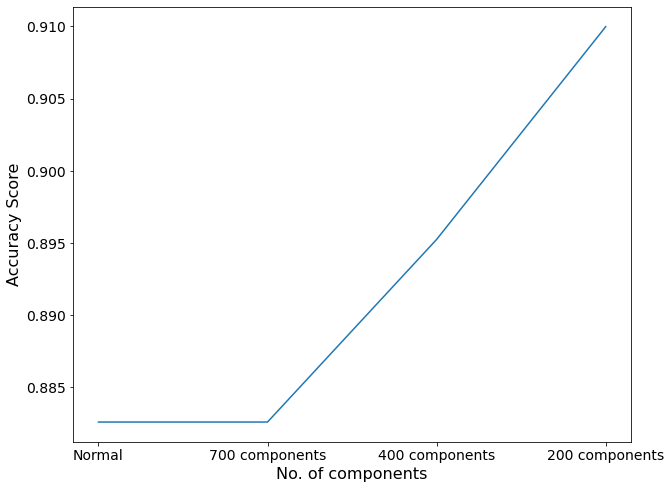

In [0]:
#Generating the graph
plt.plot(["Normal","700 components","400 components","200 components"],accuracy)
plt.xlabel("No. of components")
plt.ylabel("Accuracy Score")
plt.show()

# *TASK 2*: Demonstrating how feature selection improves accuracy and decreases training time

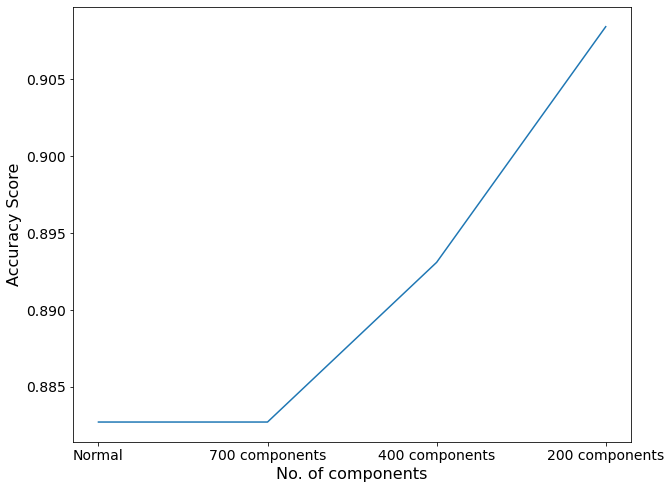

[0.8826964285714286, 0.8826964285714286, 0.8930892857142857, 0.9084285714285715]


In [0]:
#Generating graph to depict improvement in accuracy 
plt.plot(["Normal","700 components","400 components","200 components"],accuracy)
plt.xlabel("No. of components")
plt.ylabel("Accuracy Score")
plt.show()
print(accuracy)

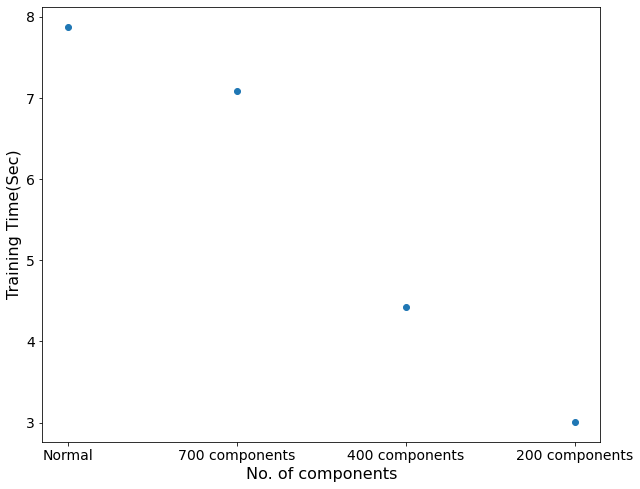

[7.87533164024353, 7.0782270431518555, 4.4275312423706055, 3.0063719749450684]


In [0]:
#Generating graph to depict decrease in training time 
plt.scatter(["Normal","700 components","400 components","200 components"],training_time)
plt.xlabel("No. of components")
plt.ylabel("Training Time(Sec)")
plt.show()
print(training_time)

# **TASK 3 :**  Identifying one predominant feature that has greatest impact on establishing accuracy of classification

In [0]:
#Mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
#Loading the dataset
db = pd.read_csv("/content/drive/My Drive/mini_project_6th_sem/diabetes.csv")
print("Shape : ",db.shape)
print(db.info())
print(db.head())

Shape :  (768, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None
   Pregnancies  Glucose  BloodPressure  ...  DiabetesPedigreeFunction  Age  Outcome
0            6      148             72  ...                     0.627   50        1
1            1       85             66  ...      

In [0]:
#Splitting dataset into dependent variable and independent variable
db_Y = db['Outcome']
db_X = db.drop(['Outcome'],axis = 1)
#splitting the dataset into training and testing parts
train_X, test_X, train_Y, test_Y = train_test_split(db_X,db_Y,test_size=0.7,random_state=10)
#Standardizing the dataset
scaler = StandardScaler()
scaler.fit(train_X)
train_X = pd.DataFrame(data = scaler.transform(train_X), columns = train_X.columns)
test_X = pd.DataFrame(data = scaler.transform(test_X), columns = test_X.columns)
#applying logistic regression classification technique
lreg = LogisticRegression(random_state = 10)
lreg.fit(train_X,train_Y)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=10, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

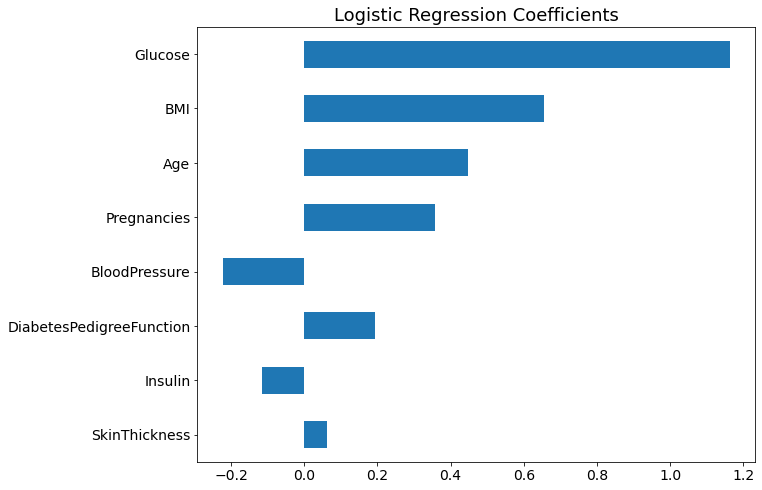

In [0]:
#Calculating the importance of each feature
features_lreg = pd.DataFrame(list(zip(test_X.columns, lreg.coef_[0])))
features_lreg = features_lreg.reindex(features_lreg[1].abs().
                                      sort_values().index).set_index(0)
#plotting the feature importance
plot = features_lreg.plot.barh(legend = "")
plot.set(xlabel = "", ylabel = "", title = "Logistic Regression Coefficients")
plt.show()
#The feature "Glucose" is the predominant feature affecting the accuracy the most